In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resultsFolder = 'results/tests/'
def get_valueRL(filename) :
    data = []
    for i in range(1):
        fname = resultsFolder + filename + str(i) + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        rw_refined = get_avg(rw)

        data.append(rw_refined)
    merged = pd.concat(data,axis=1)
    means = np.mean(merged, axis=1)
    return means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resultsFolder = 'results/tests/'
def get_valueRL(filename) :
    data = []
    for i in range(1):
        fname = resultsFolder + filename + str(i) + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        rw_refined = get_avg(rw)

        data.append(rw_refined)
    merged = pd.concat(data,axis=1)
    means = np.mean(merged, axis=1)
    return means

In [3]:
def get_value(filename, pro = None, acc = None) :
    data = []
    for i in range(1):
        fname = resultsFolder + filename + str(i) + '_' + str(pro) + '_' + str(acc) + '_False' + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        rw_refined = get_avg(rw)
        data.append(rw_refined)
    merged = pd.concat(data,axis=1)

    means = merged.mean(axis=1)
    upper = merged.max(axis=1)
    lower = merged.min(axis=1)
    return means, lower, upper

def get_value_ppr(filename, pro = None, acc = None) :
    data = []
    for i in range(3):
        fname = resultsFolder + filename + str(i) + '_' + str(pro) + '_' + str(acc) + '_True' + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        rw_refined = get_avg(rw)
        data.append(rw_refined)

    merged = pd.concat(data,axis=1)

    means = merged.mean(axis=1)
    upper = merged.max(axis=1)
    lower = merged.min(axis=1)
    return means, lower, upper

def get_avg(data):

    #get avg last 200 reward 
    num_loop = 100
    rewards = data.tolist()
    avg_reward = [0.] * (len(rewards) - num_loop)
    r_count = 0.
    for i in range(len(rewards)):
        r_count += float(rewards[i])
        if i >= num_loop:
            r_count -= float(rewards[i - num_loop])
            avg_reward[i - num_loop] = r_count / num_loop

    # get avg of cumulative_rewards
    """
    rewards = data.tolist()
    avg_reward = [0.] * len(rewards)
    cumulative_rewards = [0.] * len(rewards)
    cumulated_r = 0.
    for i in range(len(rewards)):
        cumulated_r += rewards[i]
        cumulative_rewards[i] = cumulated_r
    for i in range(len(rewards)):
        avg_reward[i] = cumulative_rewards[i]/ (i+1)
    """
            
    return pd.Series(avg_reward)
    # return data

In [18]:
def plotRewards(filename, RL, 
            # IRLOptmist, OIRLOptmistlower, OIRLOptmistupper,
            # IRLOptmistPPR, OIRLOptmistlowerPPR, OIRLOptmistupperPPR,
            IRLReal, IRLReallower, IRLRealupper,
            IRLRealPPR, IRLReallowerPPR, IRLRealupperPPR
            # IRLPessmistic, IRLPessmisticlower, IRLPessmisticupper,
            # IRLPessmisticPPR, IRLPessmisticlowerPPR, IRLPessmisticupperPPR
):
    fig = plt.figure(figsize=(10, 10))
    # grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
    grid = plt.GridSpec(1, 1, wspace=0.2, hspace=0.2)
    ax2 = plt.subplot(grid[0, 0])

    fig.suptitle('Collected reward', fontsize=16)

    # ax1.set_title('Optimistic agents')
    # ax1.plot(RL, label = 'Baseline RL', linestyle = '--', color = 'y' )
    # ax1.plot(IRLOptmist, label = 'Non-persistence RL Op', linestyle = '--', color =  'r')
    # ax1.plot(IRLOptmistPPR, label = 'Persistence RL Op', linestyle = '-', color =  'r')
    # ax1.fill_between(np.arange(len(RL)), OIRLOptmistlower, OIRLOptmistupper, color = 'r', alpha=0.1)
    # ax1.fill_between(np.arange(len(RL)), OIRLOptmistlowerPPR, OIRLOptmistupperPPR, color = 'r', alpha=0.3)

    ax2.set_title('Realistic agents', fontsize=16)
    ax2.plot(RL, label = 'Baseline RL', linestyle = '--', color = 'y' )
    ax2.plot(IRLReal, label = 'Non-persistence', linestyle = '--', color =  'g')
    ax2.plot(IRLRealPPR, label = 'Persistence', linestyle = '-', color =  'g')
    # ax2.fill_between(np.arange(len(RL)), IRLReallower, IRLRealupper, color = 'g', alpha=0.1)
    ax2.fill_between(np.arange(len(RL)), IRLReallowerPPR, IRLRealupperPPR, color = 'g', alpha=0.3)

    # ax3.set_title('Pessmistic agents')
    # ax3.plot(RL, label = 'Baseline RL', linestyle = '--', color = 'y' )
    # ax3.plot(IRLPessmistic, label = 'Non-persistence RL Pessmistic', linestyle = '--', color =  'b')
    # ax3.plot(IRLPessmisticPPR, label = 'Persistence RL Pessmistic', linestyle = '-', color =  'b')
    # ax3.fill_between(np.arange(len(RL)), IRLPessmisticlower, IRLPessmisticupper, color = 'b', alpha=0.1)
    # ax3.fill_between(np.arange(len(RL)), IRLPessmisticlowerPPR, IRLPessmisticupperPPR, color = 'b', alpha=0.3)

    plt.xlabel('Episodes', fontsize=16)
    plt.ylabel('Average last 100 episodes rewards', fontsize=16)
    # fig.text(0.5, 0.04, 'Episodes', ha='center')
    # fig.text(0.04, 0.5, 'Average last 100 episodes rewards', va='center', rotation='vertical')

    ax2.legend(prop={"size":13})

#     plt.legend(loc=4,prop={'size':8}, bbox_to_anchor=(1.5, -0.3),
#           fancybox=True, shadow=True, ncol=5)

    fig.savefig(resultsFolder + filename + '.pdf')

    fig.show()

In [6]:
RL= get_valueRL("agentRL")

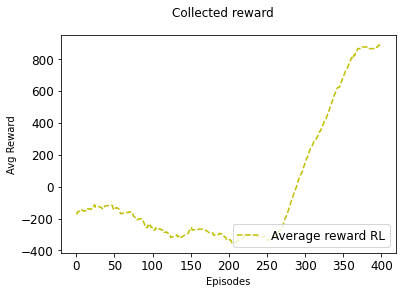

In [62]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure('Collected reward')
plt.suptitle('Collected reward')

plt.plot(RL, label = 'Average reward RL', linestyle = '--', color = 'y' )

plt.legend(loc=4,prop={'size':12})
plt.xlabel('Episodes')
plt.ylabel('Avg Reward')

plt.show()

In [19]:
# IRLOptmist, IRLOptmistlower, IRLOptmistupper = get_value("agentRL", 1, 1)
# IRLOptmistPPR, IRLOptmistlowerPPR, IRLOptmistupperPPR = get_value_ppr("rewardsIRL", 1, 1)
IRLReal, IRLReallower, IRLRealupper = get_value("agentRL", 0.47316, 0.9487)
IRLRealPPR, IRLReallowerPPR, IRLRealupperPPR = get_value_ppr("agentRL", 0.47316, 0.9487)
# IRLPessmistic, IRLPessmisticlower, IRLPessmisticupper = get_value("rewardsIRL", 0.23658, 0.47435)
# IRLPessmisticPPR, IRLPessmisticlowerPPR, IRLPessmisticupperPPR = get_value_ppr("rewardsIRL", 0.23658, 0.47435)

ipykernel_launcher:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


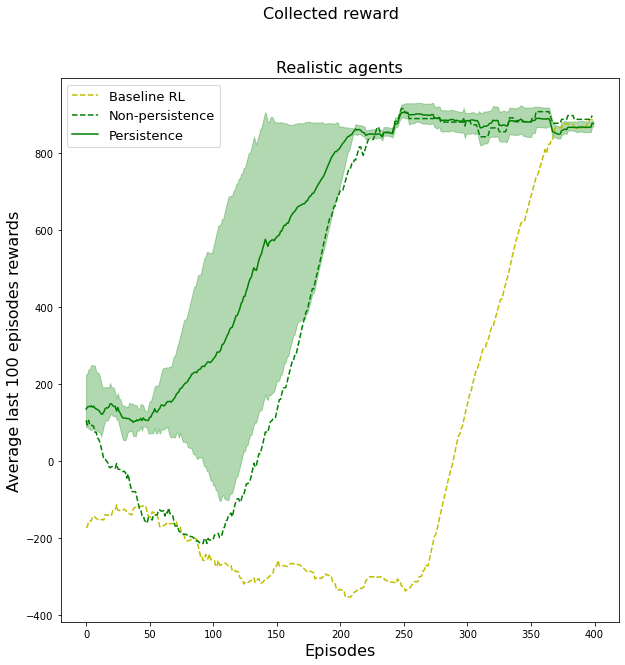

In [20]:
plotRewards("rewards", 
            RL, 
            # IRLOptmist, IRLOptmistlower, IRLOptmistupper,
            # IRLOptmistPPR, IRLOptmistlowerPPR, IRLOptmistupperPPR,
            IRLReal, IRLReallower, IRLRealupper,
            IRLRealPPR, IRLReallowerPPR, IRLRealupperPPR
            # IRLPessmistic, IRLPessmisticlower, IRLPessmisticupper,
            # IRLPessmisticPPR, IRLPessmisticlowerPPR, IRLPessmisticupperPPR
            )